## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 

### Features

* MoSold: Month Sold
* YrSold: Year Sold   
* SaleType: Type of sale
* SaleCondition: Condition of sale
* MSSubClass: The building class
* MSZoning: The general zoning classification
* ...

In [79]:
import pandas as pd 
import numpy as np

## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [80]:
path = "_Ames_Housing_Sales.csv"
dF = pd.read_csv(path, sep=",")

In [81]:
dF.dtypes.value_counts()

In [82]:
dF.shape

(1379, 80)

In [83]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

## Question 2

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. 

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [84]:
mask  = dF.dtypes == np.object
Cat_Cols = dF.columns[mask]
dF[Cat_Cols]

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,None,1Fam,None,None,None,None,None,Y,Norm,Norm,...,None,Gilbert,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1375,None,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,...,None,NWAmes,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1376,None,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,...,Shed,Crawfor,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1377,None,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,...,None,NAmes,Y,None,CompShg,Hip,Normal,WD,Pave,AllPub


In [85]:
num_ohe_col  = (dF[Cat_Cols]
.apply(lambda x: x.nunique())
.sort_values(ascending=False))
#ohe = one hot encoded

if we  apply one-hot encoded each variable by created n-1 features this so much 

no need encoded if there is only one variable 

In [86]:
small_num_ohc_cols = num_ohe_col.loc[num_ohe_col > 1]
small_num_ohc_cols -= 1

In [87]:
small_num_ohc_cols.sum()
# this means extra 215 feature one data set

215

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [88]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
dF_OHC = dF.copy()
ohc = OneHotEncoder()
le = LabelEncoder()

for _ in num_ohe_col.index:
   
    # ınteger encode the strings categories 
    dat = le.fit_transform(dF_OHC[_]).astype(np.int)

    # Remove the original column  from dataframe 
    dF_OHC = dF_OHC.drop(_, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # create a unique column names
    n_col = new_dat.shape[1]
    col_names = ['_'.join([_, str(x)]) for  x in range(n_col)]

    # Create New DF
    New_dF = pd.DataFrame(new_dat.toarray(),
                          index=dF_OHC.index,
                          columns=col_names)
    
    #Append to newdF to dF

    dF_OHC = pd.concat([dF_OHC, New_dF] ,axis=1  )



In [89]:
dF_OHC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Columns: 295 entries, 1stFlrSF to Utilities_1
dtypes: float64(279), int64(16)
memory usage: 3.1 MB


In [90]:
#Column Differen First and Last DF

dF_OHC.shape[1] - dF.shape[1]

215

In [91]:
dF = dF.drop(num_ohe_col.index, axis=1)

In [94]:
dF.shape

(1379, 37)

In [103]:
dF_OHE

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [96]:
from sklearn.model_selection import train_test_split

y_col = "SalePrice"

In [98]:

# split the data this not one hot encoded
feature_cols = [x for x in dF.columns if x != y_col]
X_data = dF[feature_cols]
Y_data = dF[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=.3,
                                                                  random_state=42)


# split the data that is one hot encoded

feature_cols = [x for x in dF_OHC if x != y_col]
X_Data_Ohc = dF_OHC[feature_cols]
Y_Data_Ohc = dF_OHC[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_Data_Ohc, Y_Data_Ohc, test_size = .3,
                                                                random_state=42)

In [101]:
(X_train_ohc.index == X_train.index).all() # Compare they are identical 

True

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for Error Values

MSE_dF = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)

y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

MSE_dF.append(pd.Series({"Train": mean_squared_error(y_train, y_train_pred),
               "Test" : mean_squared_error(y_test, y_test_pred)},
                name = "No Encoding"))

# Data That have one Hot Encoded

LR = LR.fit(X_train_ohc, y_train_ohc)

y_train_ohcp = LR.predict(X_train_ohc)
y_test_ohcp = LR.predict(X_test_ohc)

MSE_dF.append(pd.Series({"Train": mean_squared_error(y_train_ohc, y_train_ohcp),
               "Test" : mean_squared_error(y_test_ohc, y_test_ohcp)},
                name = "One Hot Encoding"))
# Assemble the Result 

MSE_dF = pd.concat(MSE_dF, axis=1)
MSE_dF

,No Encoding,One Hot Encoding
Train,1.131507e+09,3.177261e+08
Test,1.372182e+09,2.531138e+16


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [105]:
# Mute the setting with a copy warnings
pd.options.mode.chained_assignment = None

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        1.372182e+09
not_encoded - minmaxscaling          1.372179e+09
not_encoded - maxabsscaling          1.372198e+09
one_hot_encoded - standardscaling    8.065328e+09
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - maxabsscaling      8.065328e+09
--------------------------------------------------------------------------------
not_encoded - standardscaling 1372182358.934498
not_encoded - minmaxscaling 1372178956.3054204
not_encoded - maxabsscaling 1372198042.4824016
one_hot_encoded - standardscaling 8065327607.247184
one_hot_encoded - minmaxscaling 8065327607.180088
one_hot_encoded - maxabsscaling 8065327607.212254


## Question 6

Plot predictions vs actual for one of the models.

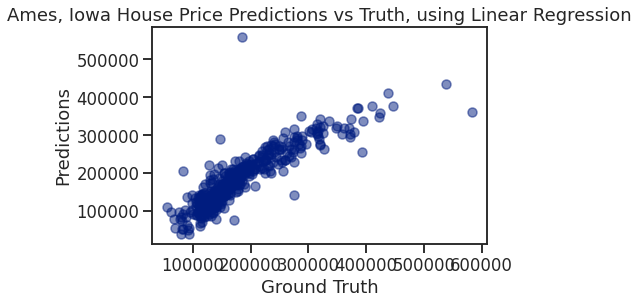

In [122]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("dark")

ax = plt.axes()

# we are going to use test_Y and Prediction_test_y
ax.scatter(y_test, y_test_pred, alpha = .5)
ax.set(xlabel = "Ground Truth",
       ylabel = "Predictions",
       title = "Ames, Iowa House Price Predictions vs Truth, using Linear Regression"
)
plt.show()